# 1. IMPORT MODULES

In [171]:
import inference
import clustering
import importlib
import loadSaveData
importlib.reload(inference)
importlib.reload(clustering)
importlib.reload(loadSaveData)

<module 'loadSaveData' from 'C:\\Users\\Nagore\\PycharmProjects\\PruebitasMineria\\src\\loadSaveData.py'>

# 2. LOAD TRAIN AND CREATE OR LOAD TEST EMBEDDINGS

In [154]:
train=loadSaveData.loadEmbeddings(length=10000,dimension=768,type='bert')

Cargando embeddings...


In [135]:
test=inference.create_test_embeddings()

You are using a model of type xlm-roberta to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generando embeddings:  27%|██▋       | 539/2000 [02:46<07:32,  3.23it/s]

KeyboardInterrupt



In [155]:
test= loadSaveData.loadEmbeddings(length=2000,dimension=768,type='bert')

Cargando embeddings...


# 3. CLUSTERING

## 3.1. DBSCAN ORIGINAL

In [156]:
#eps=0.05,minpts= 3
clusters=loadSaveData.loadClusters('dbscan')
print(clusters)

[0 0 0 ... 0 0 0]


BUSCAR INSTANCIAS DEL CLUSTER 1 Y RUIDO DEL TRAIN

In [157]:
inference.buscar_instancias_cluster(train,clusters,-1)

210
253
318
349
408
509
544
916
1394
1594
1757
2403
2681
2767
2812
3132
3458
3654
3702
3756
3878
3901
3946
4386
4486
4679
4724
4806
4970
5118
5131
5274
5296
5577
6053
6728
6861
6959
7046
7097
7790
7930
7972
8332
8365
8398
8564
8732
8902
9184
9224
9253
9353
9370
9425
9483
9592
9913
9993


AÑADIR AL TEST LAS INSTANCIAS TEST QUE NOS INTERESAN

In [158]:
# 2 instancias ruido y 2 del cluster 1
instances_to_add=[210,253,4084,4510]
test= inference.add_instances_to_test(train,test,instances_to_add)
print(len(test))

2004


### 3.1.1. ASIGNAR CLUSTERS AL TEST

In [159]:
clusters_test_instancia=inference.asignar_cluster_test(train,test,clusters)
print(clusters_test_instancia)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Instancias ruido

In [160]:
for i in range(len(clusters_test_instancia)):
    if clusters_test_instancia[i]==-1:
        print(i)

1185
2000
2001


REDUCIR DIMENSIONES - 2D

In [161]:
train_reducido,test_reducido=inference.reducir_dim(train,test,2)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 2)
Dim test originally:  (2004, 768)
Dim test after PCA:  (2004, 2)


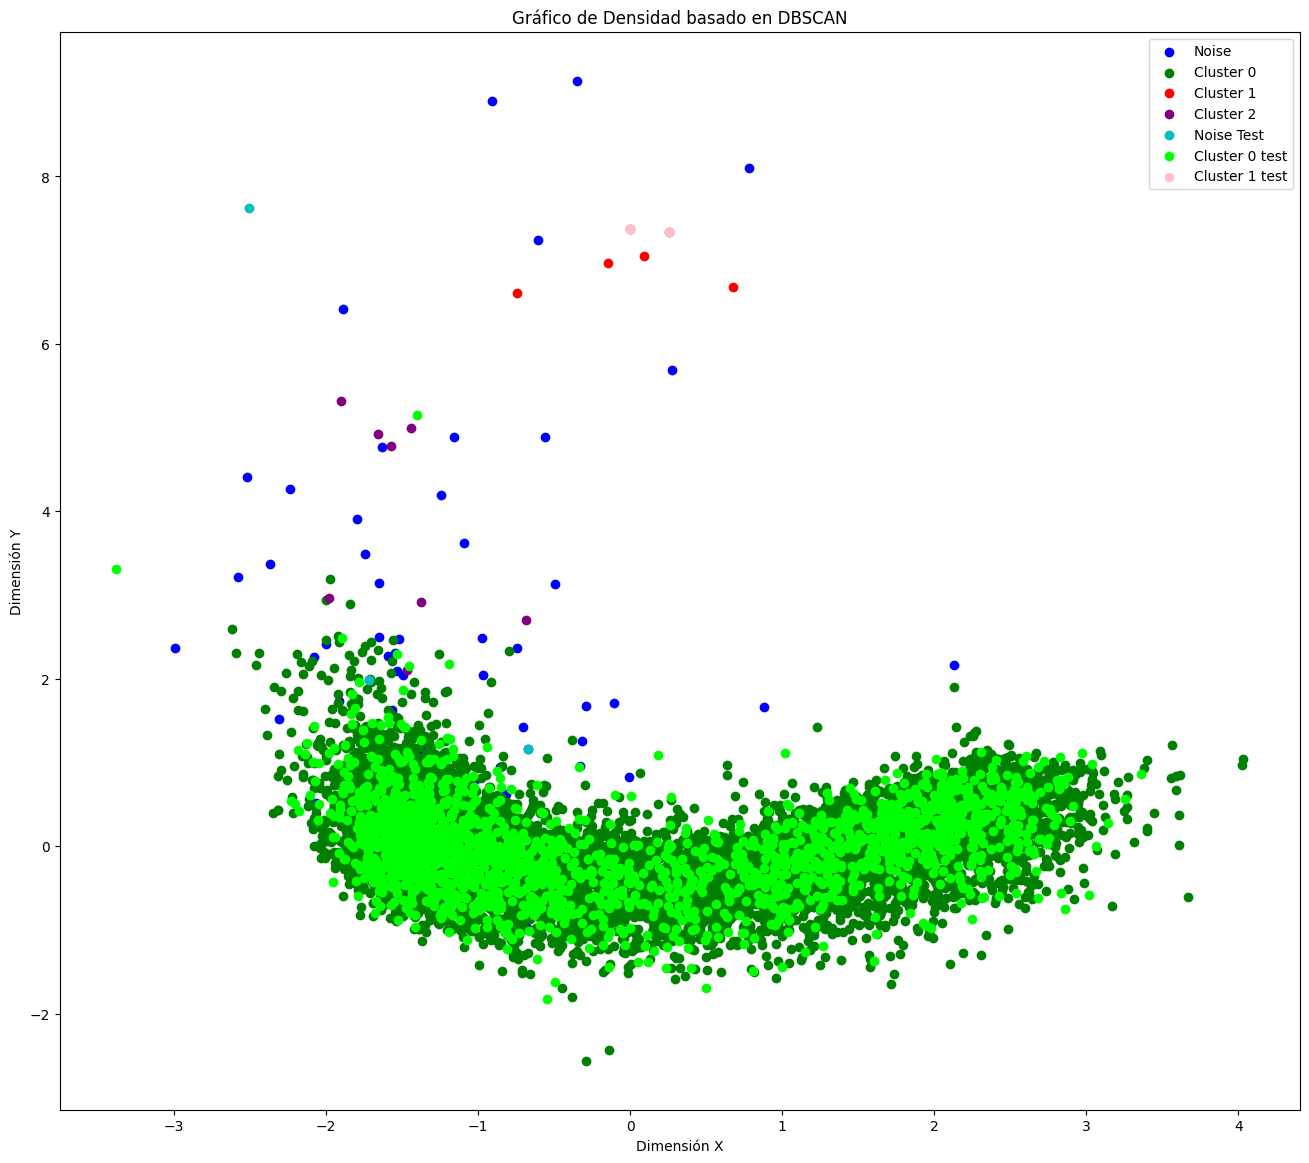

In [175]:
inference.grafico(train_reducido,clusters,test_reducido,clusters_test_instancia)

REDUCIR DIMENSIONES - 3D

In [173]:
train_reducido,test_reducido=inference.reducir_dim(train,test,3)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 3)
Dim test originally:  (2004, 768)
Dim test after PCA:  (2004, 3)


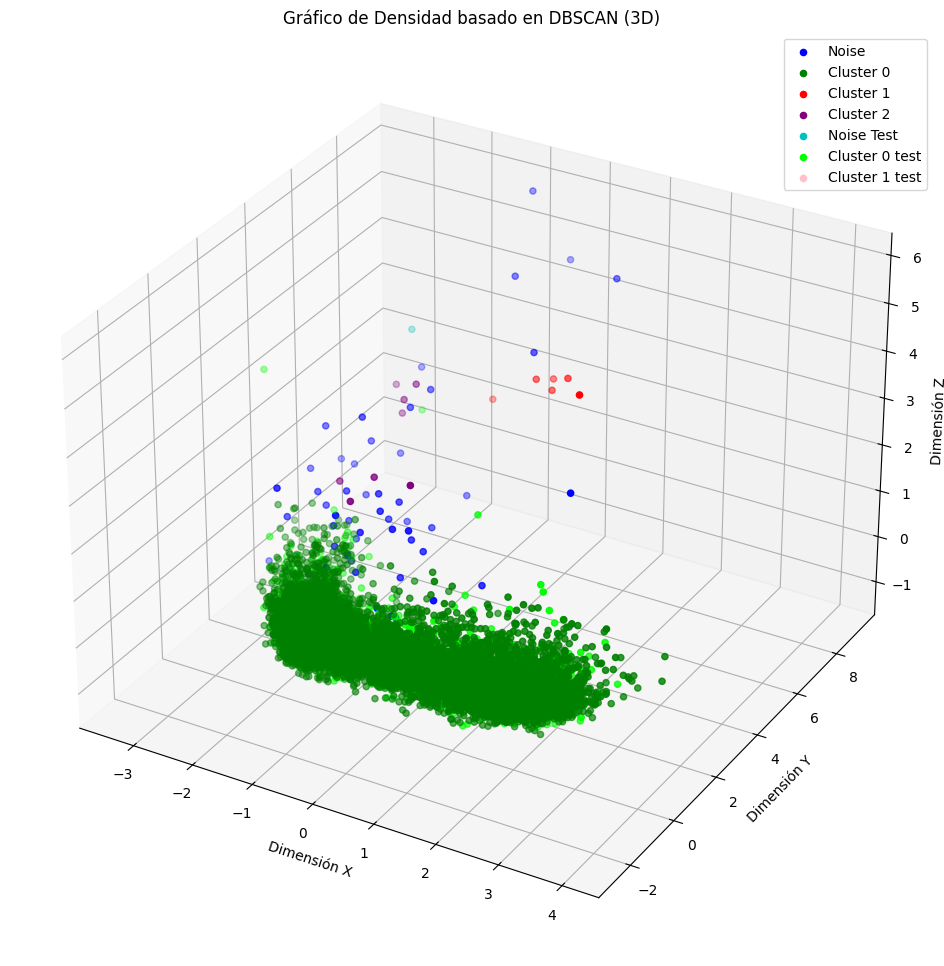

In [176]:
inference.grafico_3d(train_reducido,clusters,test_reducido,clusters_test_instancia)

## 3.2. DBSCAN IMPLEMENTADO

In [95]:
#da error
clusters=loadSaveData.loadClusters('urruela')

CALCULANDO DISTANCIAS
TOTAL DE 49995000 DISTANCIAS CALCULADAS
aaaaaaaaaaaaaaaaaaaaaaaaa
aaaaa


EXPLORANDO NUCLEOS: 0it [00:00, ?it/s]

Hay un total de 10000 instancias que son ruido
Del cluster 0 hay 0 instancias


BUSCAR INSTANCIAS DEL CLUSTER 1 Y RUIDO DEL TRAIN

In [96]:
inference.buscar_instancias_cluster(train, clusters, -1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

AÑADIR AL TEST LAS INSTANCIAS TEST QUE NOS INTERESAN

In [97]:
# 2 instancias ruido y 2 del cluster 1
instances_to_add=[210,253,4084,4510]
test= inference.add_instances_to_test(train,test,instances_to_add)

### 3.1.1. ASIGNAR CLUSTERS AL TEST - INSTANCIA MAS CERCANA

In [98]:
clusters_test_instancia=inference.asignar_cluster_test_instancia(train,test,clusters)
print(clusters_test_instancia)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

REDUCIR DIMENSIONES - 2D

In [99]:
train_reducido,test_reducido=inference.reducir_dim(train,test,2)

Dim train originally:  (10000, 768)
Dim train after PCA:  (10000, 2)
Dim test originally:  (2008, 768)
Dim test after PCA:  (2008, 2)


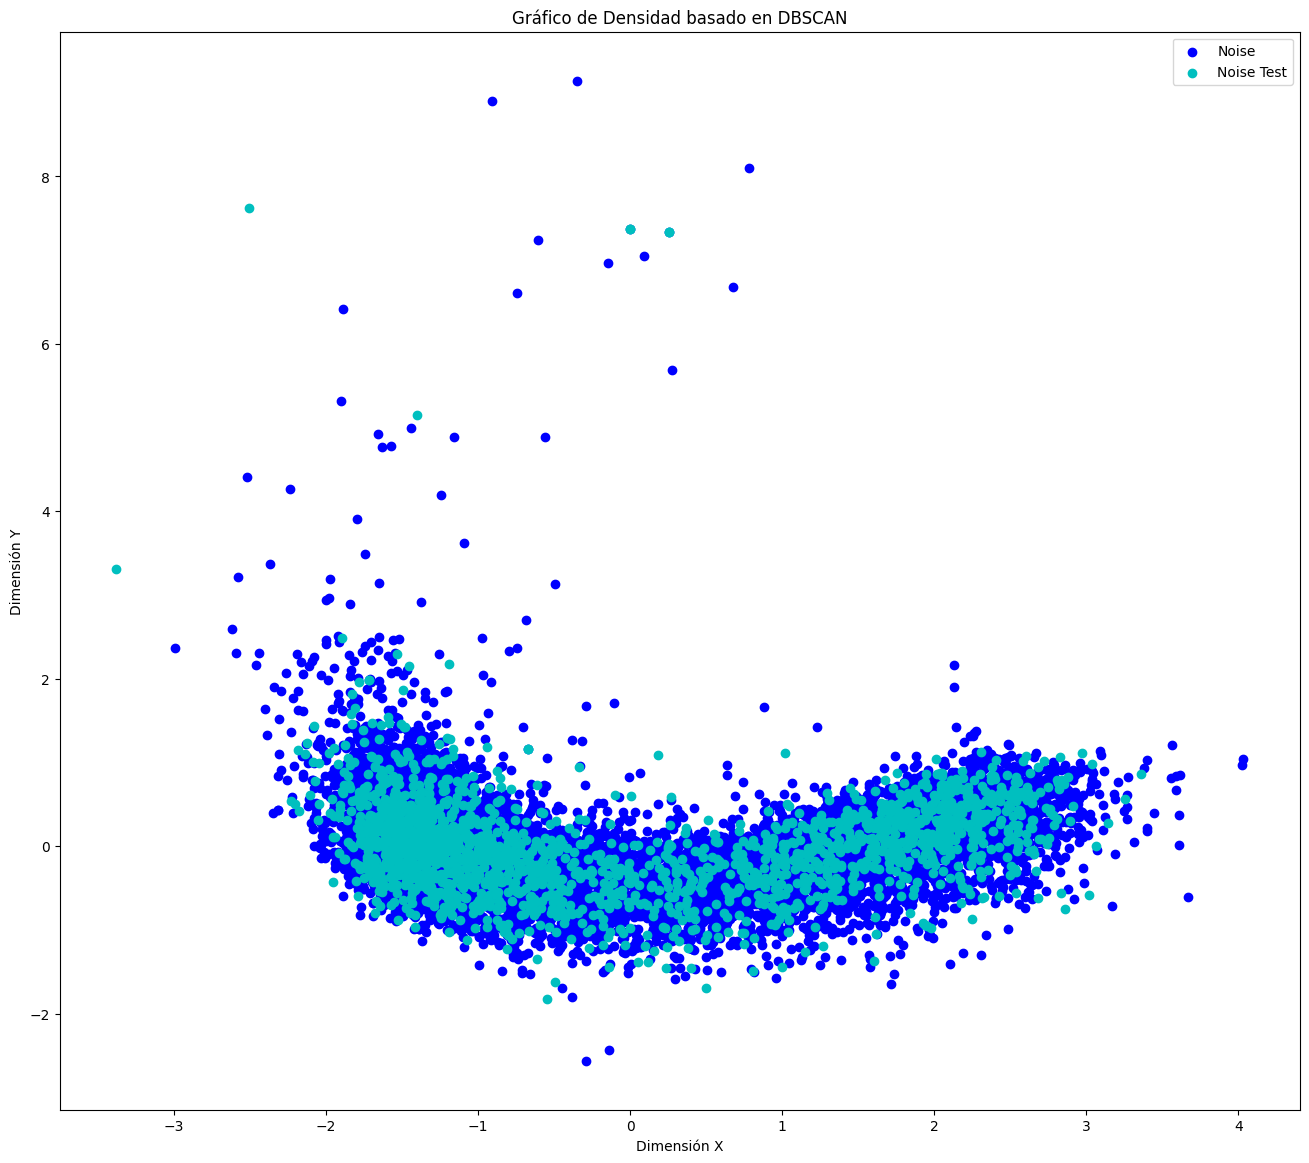

In [100]:
inference.grafico_instancia(train_reducido,clusters,test_reducido,clusters_test_instancia)

REDUCIR DIMENSIONES - 3D

In [ ]:
train_reducido,test_reducido=inference.reducir_dim(train,test,3)

In [ ]:
inference.grafico_3d(train_reducido,clusters,test_reducido,clusters_test_instancia)